     Ref                                           geometry  \
156  157  POLYGON ((-3.008810406770437 56.45359320122489...   
158  159  POLYGON ((-3.009070173986712 56.46338908132782...   
159  160  POLYGON ((-3.009200118796403 56.46828701525071...   
170  171  POLYGON ((-2.999965333223151 56.45366478656688...   
171  172  POLYGON ((-3.000094058576659 56.45856274187415...   
172  173  POLYGON ((-3.000222824362224 56.46346069309894...   
174  175  POLYGON ((-3.000480477299468 56.47325658330193...   
183  184  POLYGON ((-2.990992671842769 56.44883776929721...   
184  185  POLYGON ((-2.991120219261309 56.45373574178041...   
185  186  POLYGON ((-2.991247806737354 56.45863371018426...   
186  187  POLYGON ((-2.991375434288225 56.46353167450901...   
187  188  POLYGON ((-2.991503101931251 56.46842963475488...   
188  189  POLYGON ((-2.991630809683768 56.47332759092205...   
189  190  POLYGON ((-2.991758557563128 56.47822554301074...   
197  198  POLYGON ((-2.982148655361145 56.4489080813991

<ipython-input-1-a231060eaa62>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand['sum'] = demand.sum(axis='columns')
<ipython-input-1-a231060eaa62>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["x_centre"] = center_x
<ipython-input-1-a231060eaa62>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

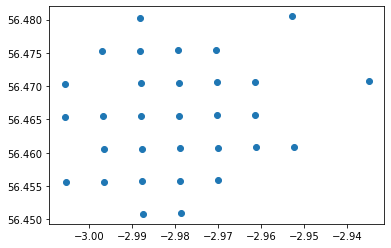

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('Demand_Data.xlsx')

data1 = pd.DataFrame()

demand = data[['Demand_0','Demand_1','Demand_2','Demand_3']]

demand['sum'] = demand.sum(axis='columns')

new_data=data[demand['sum']!=0]

geometry=list(new_data['geometry'])


geometry1=[]
for i in range(len(geometry)):
    geometry1.append(geometry[i].split(', '))
    

geometry2=[]
for i in range(len(geometry1)):
    for j in range(len(geometry1[i])):
        geometry2.append(geometry1[i][j].replace("POLYGON ","").replace("(","").replace(")",""))


geometry3=[]
for k in range(len(geometry2)):
        geometry3.append(geometry2[k].split(' '))
        
x=[]   
for i in range(len(geometry3)):
    x.append(float(geometry3[i][0]))

y=[]
for i in range(len(geometry3)):
    y.append(float(geometry3[i][1]))  
    
center_x=[]
for i in range(len(geometry3)//5):
       center_x.append(np.mean(x[i*5:i*5+5]))

center_y=[]
for i in range(len(geometry3)//5):
       center_y.append(np.mean(y[i*5:i*5+5]))


# central area
new_data["x_centre"] = center_x
new_data["y_centre"] = center_y


limit = np.percentile(new_data['Distance from Centre'],30)#2743.2006677604836

central_area=new_data[new_data['Distance from Centre']<= limit]
sub_area=new_data[new_data['Distance from Centre']>limit]


plt.scatter(central_area['x_centre'],central_area['y_centre'])
print(central_area)

In [23]:
#conbined potential and current points
points_data = pd.read_csv('Total_point_final.csv')


#points_data.reset_index(drop = True, inplace = True)
points_data.columns
points_data.insert(1, 'ID', 1, allow_duplicates=False)
for i in range(len(points_data)):
    points_data.loc[i, 'ID'] = i

central_points=points_data[points_data['Distance']<= limit]
sub_points=points_data[points_data['Distance']>limit]
central_points.shape[0]#185
sub_points.shape[0]#162
central_points['ID'].to_csv('central_points_ID.csv')

In [24]:
sub_points['ID'].to_csv('sub_points_ID.csv')

In [25]:
#Calculate distance between points and demand points

#for central area
points_coordinates1=central_points[['Longitude','Latitude']]
center_demand =central_area[['x_centre', 'y_centre']]

#for suburb area
points_coordinates2=sub_points[['Longitude','Latitude']]
sub_demand = sub_area[['x_centre', 'y_centre']]


point_coordinates = points_data[['Longitude','Latitude']]
point_coordinates.shape#(325, 2)
demand_coordinates = new_data[['x_centre','y_centre']]
#one potential point to all demand points (169,103)

In [ ]:
def demand_index_near_point(Distance,propotion):
    d1 = limit * propotion
    index1 = pd.DataFrame(Distance)<=d1
    index_demand = []
    for i in range(index1.shape[0]):
        index2 = []
        for j in range(index1.shape[1]):
            if index1.iloc[i,j] == True:
                index2.append(j)
        index_demand.append(index2)
    return index_demand

# the index of demand point within central area: index_demand_c
Dc = Distance(points_coordinates1,center_demand) 
index_demand_c = demand_index_near_point(Dc,0.25)
len(index_demand_c)#185

# the index of demand point within central area: index_demand_s
Ds = Distance(points_coordinates2,sub_demand) 
index_demand_s = demand_index_near_point(Ds,0.5)
len(index_demand_s) #162

In [26]:
2743.2006677604836/4

685.8001669401209

In [82]:
limit = 333
Distance_D_and_P = pd.read_csv('Total_point_final.csv', sep = ',', header = 0, index_col = 0)

Distance_D_and_P[Distance_D_and_P < limit] = 1
Distance_D_and_P[Distance_D_and_P >= limit] = 0
Distance_D_and_P_bi = Distance_D_and_P.astype(int)
Distance_D_and_P_bi.to_csv('Distance_D_and_P_bi.csv')

In [26]:
import pandas as pd
Interest_data = pd.read_excel('Interest_points.xlsx')
Interest_data.head()

,amenity,geometry,Latitude,Longitude,grid number
0,restaurant,POINT (-2.852617986940523 56.48412800000578),56.484128,-2.852618,400
1,restaurant,POINT (-2.849993386942502 56.47134889999293),56.471349,-2.849993,398
2,restaurant,POINT (-2.872495786961546 56.46693379999114),56.466934,-2.872496,369
3,restaurant,POINT (-2.873346686962511 56.46599179999032),56.465992,-2.873347,369
4,restaurant,POINT (-2.873426086962618 56.46584759999016),56.465848,-2.873426,369


In [27]:
Total_point_data = pd.read_csv('Total_point_final.csv')
Total_point_data.head()

,Point_ID,Latitude,Longitude,grid_number,Slow,Fast,Rapid,Total,Distance,centre_point_x,centre_point_y,bi(not_delete)
0,0,56.466217,-3.046891,89,0,0,0,0,4766.467752,-2.96848,56.45992,0
1,1,56.472241,-2.848474,412,0,0,0,0,7309.757209,-2.96848,56.45992,0
2,2,56.473208,-2.895034,328,0,0,0,0,4522.546880,-2.96848,56.45992,0
3,3,56.463504,-2.963304,228,0,0,0,0,381.452070,-2.96848,56.45992,0
4,4,56.460974,-2.977650,200,0,0,0,0,559.296413,-2.96848,56.45992,0


In [37]:
Interest_coordinates=Interest_data[['Longitude','Latitude']]
Total_point_coordinates=Total_point_data[['Longitude','Latitude']]
Total_point_coordinates.shape

(347, 2)

In [2]:
import math
import numpy as np
def Distance(potential,demand):
    Distance = []
    for i in range(np.array(potential).shape[0]):
        for j in range(np.array(demand).shape[0]):
            d = np.array(potential)[i]-np.array(demand)[j]
            Distance.append(math.hypot(d[0],d[1])) 
    Distance = np.array(Distance).reshape(potential.shape[0],demand.shape[0])*60592.95595
    return Distance

In [24]:
# Distance = []
# d = np.array(Total_point_coordinates)[0]-np.array(Interest_coordinates)[0]
# Distance.append(math.hypot(d[0],d[1])*60592.95595)
# Distance

[7172.0202887158075]

In [63]:
Distance_I_and_P=Distance(Total_point_coordinates,Interest_coordinates) 
#pd.DataFrame(Distance_I_and_P).to_csv('Distance_I_and_P.csv')
#Distance_I_and_P.head()
#Distance_I_and_P
Distance_I_and_P = pd.DataFrame(Distance_I_and_P)
#len(Distance_I_and_P[0])

In [70]:
#Distance_I_and_P['min_idx'] = Distance_I_and_P.idxmin(axis = 1)
Distance_I_and_P['min_val'] = Distance_I_and_P.min(axis = 1)
#Distance_I_and_P['min_val']
#Distance_I_and_P['min_idx'] 
#Distance_I_and_P.min(axis = 1)
#Distance_I_and_P.idxmin(axis = 1)
Distance_I_and_P['min_val']#.to_csv('Distance_I_and_P_min.csv')

0      132.000000
1        1.000000
2       88.000000
3       70.055248
4      104.958335
          ...    
342     83.703395
343     19.000000
344     51.396257
345    115.000000
346     26.000000
Name: min_val, Length: 347, dtype: float64

In [31]:
Distance_between_points = pd.read_csv('MMCS DATA/Distance_between_points.csv')
#Distance_between_points = Distance_between_points.iloc[304:347,305:348]
# Distance_between_points['min_val'] = Distance_between_points.min(axis = 1)
# Distance_between_points['min_val']
Distance_between_points = pd.DataFrame(Distance_between_points)
#Distance_between_points['304']
#for i in range(304,347):
Distance_between_points#.sort_values#(by=[304],axis=1)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,337,338,339,340,341,342,343,344,345,346
0,0,0.000000,12028.249092,9211.218057,5067.443466,4207.543832,4177.335005,3248.789488,766.172242,2099.161703,...,1655.410428,1861.099916,4177.553242,4221.800642,4316.503109,3970.287630,4880.847434,5116.168525,9430.950926,10501.874973
1,1,12028.249092,0.000000,2821.847217,6978.041533,7856.890143,7995.256039,8943.726327,11366.487487,9934.817740,...,10694.776023,10193.706634,7929.144878,7895.038327,7756.404531,8119.056552,7179.818779,6929.091494,2792.600271,1544.982889
2,2,9211.218057,2821.847217,0.000000,4178.275009,5060.527108,5230.331888,6126.479029,8557.912975,7121.367201,...,7875.328377,7384.148777,5146.224047,5115.637150,4963.897679,5328.920865,4386.780688,4129.467019,783.505814,1340.781459
3,3,5067.443466,6978.041533,4178.275009,0.000000,882.657915,1128.653270,2270.502935,4389.871606,2968.315873,...,3887.739760,3218.970505,990.011543,970.283177,790.226864,1155.987513,227.533113,48.953203,4499.808924,5442.864928
4,4,4207.543832,7856.890143,5060.527108,882.657915,0.000000,452.903339,1693.127083,3516.690694,2111.527412,...,3126.156999,2350.553347,216.703141,252.283942,116.219030,283.703480,677.670436,931.330931,5376.083301,6319.418960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,342,3970.287630,8119.056552,5328.920865,1155.987513,283.703480,351.557611,1655.122074,3267.032527,1884.219420,...,2960.263187,2109.423069,214.057346,266.756672,365.864219,0.000000,942.202896,1204.136998,5654.338087,6579.416024
343,343,4880.847434,7179.818779,4386.780688,227.533113,677.670436,901.125154,2174.332124,4193.988303,2782.562268,...,3743.024128,3026.409508,767.641347,745.367288,577.241792,942.202896,0.000000,271.525072,4720.186550,5641.879849
344,344,5116.168525,6929.091494,4129.467019,48.953203,931.330931,1171.999233,2311.360232,4438.813931,3017.056632,...,3933.602181,3267.878190,1036.714852,1016.139946,838.311792,1204.136998,271.525072,0.000000,4452.292390,5393.918755
345,345,9430.950926,2792.600271,783.505814,4499.808924,5376.083301,5599.947562,6259.491247,8813.084262,7367.721929,...,8013.738528,7642.701672,5487.825754,5463.885857,5289.286785,5654.338087,4720.186550,4452.292390,0.000000,1586.176033
